In [21]:
# Packages
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tensorflow.keras.utils import plot_model
import visualkeras

In [3]:
# Data Collection
data_dir = '/content/drive/MyDrive/Food Dataset'

In [4]:
# Data Preprocessing
image_size = (224, 224)
batch_size = 32

datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True, validation_split=0.2)

train_generator = datagen.flow_from_directory(data_dir, target_size=image_size, batch_size=batch_size, class_mode='categorical', subset='training')

validation_generator = datagen.flow_from_directory(data_dir, target_size=image_size, batch_size=batch_size, class_mode='categorical', subset='validation')

num_classes = len(train_generator.class_indices)

Found 5012 images belonging to 14 classes.
Found 1244 images belonging to 14 classes.


In [5]:
print(train_generator.class_indices)
print(validation_generator.class_indices)

{'burger': 0, 'butter_naan': 1, 'chai': 2, 'chapati': 3, 'chole_bhature': 4, 'dal_makhani': 5, 'dhokla': 6, 'fried_rice': 7, 'idli': 8, 'jalebi': 9, 'kaathi_rolls': 10, 'kulfi': 11, 'pakode': 12, 'samosa': 13}
{'burger': 0, 'butter_naan': 1, 'chai': 2, 'chapati': 3, 'chole_bhature': 4, 'dal_makhani': 5, 'dhokla': 6, 'fried_rice': 7, 'idli': 8, 'jalebi': 9, 'kaathi_rolls': 10, 'kulfi': 11, 'pakode': 12, 'samosa': 13}


In [6]:
# Model Architecture
base_model = MobileNet(input_shape=(224, 224, 3), weights='imagenet', include_top=False)
x = base_model.output
x = GlobalAveragePooling2D()(x)
predictions = Dense(num_classes, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

17225924/17225924 [==============================] - 0s 0us/step


In [7]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 32)      128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 32)      288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 112, 112, 32)      128   

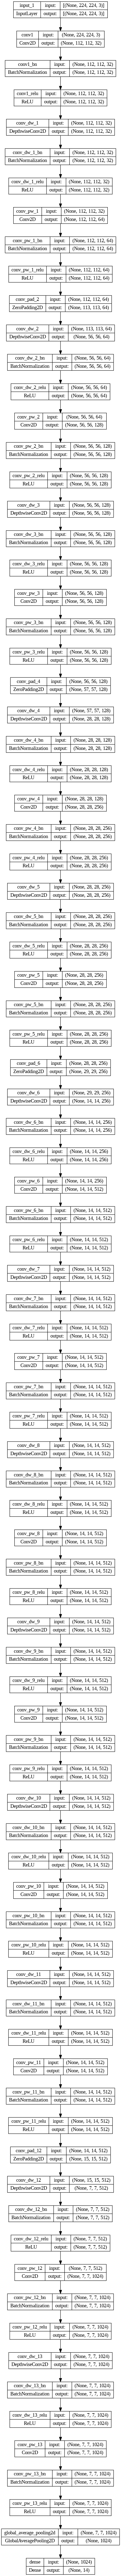

In [8]:
plot_model(model, to_file='mobilenet_model.png', show_shapes=True, show_layer_names=True)

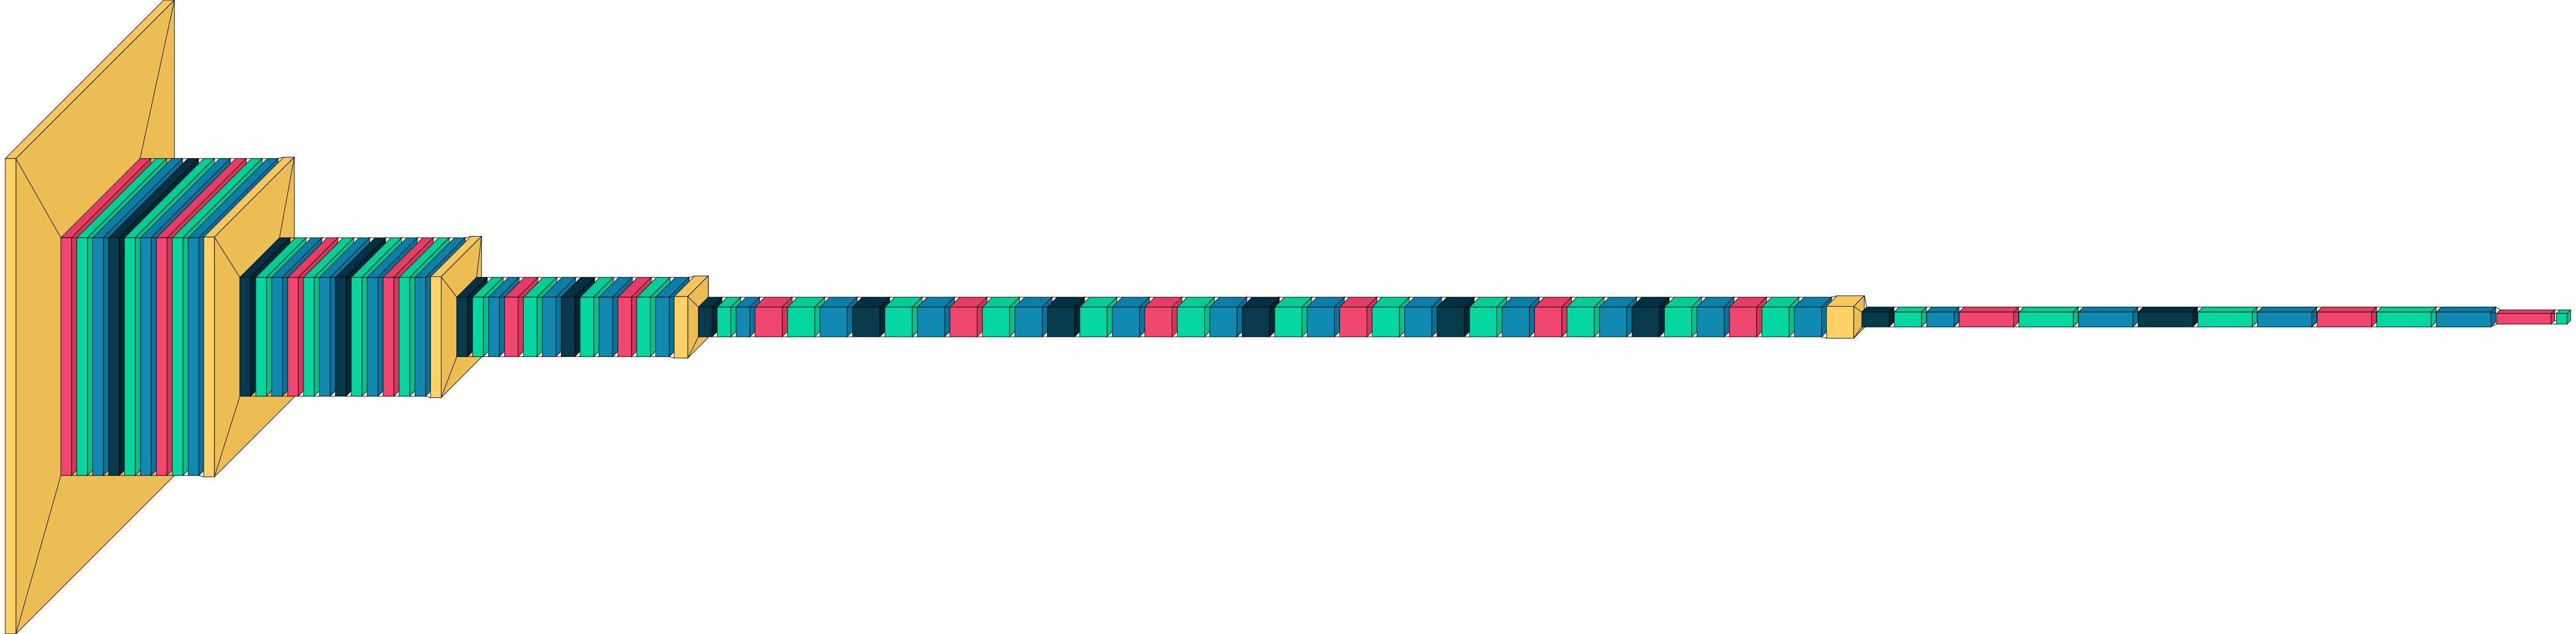

In [9]:
visualkeras.layered_view(model)

In [10]:
# Transfer Learning
for layer in base_model.layers:
    layer.trainable = False

In [11]:
# Model Training
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_generator, validation_data=validation_generator, epochs=10)

Epoch 1/10
157/157 [==============================] - 1339s 9s/step - loss: 1.2164 - accuracy: 0.6439 - val_loss: 0.3855 - val_accuracy: 0.9084
Epoch 2/10
157/157 [==============================] - 475s 3s/step - loss: 0.5399 - accuracy: 0.8452 - val_loss: 0.2813 - val_accuracy: 0.9285
Epoch 3/10
157/157 [==============================] - 505s 3s/step - loss: 0.4201 - accuracy: 0.8793 - val_loss: 0.2482 - val_accuracy: 0.9285
Epoch 4/10
157/157 [==============================] - 506s 3s/step - loss: 0.3552 - accuracy: 0.8970 - val_loss: 0.2151 - val_accuracy: 0.9413
Epoch 5/10
157/157 [==============================] - 457s 3s/step - loss: 0.2975 - accuracy: 0.9144 - val_loss: 0.1858 - val_accuracy: 0.9606
Epoch 6/10
157/157 [==============================] - 518s 3s/step - loss: 0.2608 - accuracy: 0.9272 - val_loss: 0.1879 - val_accuracy: 0.9510
Epoch 7/10
157/157 [==============================] - 520s 3s/step - loss: 0.2359 - accuracy: 0.9316 - val_loss: 0.2018 - val_accuracy: 0.938

In [15]:
# Model Evaluation
def evaluate_model(model, test_generator, target_names):
    test_generator.reset()
    predictions = model.predict(test_generator)
    y_pred = np.argmax(predictions, axis=1)
    y_true = test_generator.classes

    accuracy = accuracy_score(y_true, y_pred)
    print("\nAccuracy:", accuracy)

    print("\nClassification Report:\n")
    print(classification_report(y_true, y_pred, target_names=target_names))

    print("\nConfusion Matrix:\n")
    cm = confusion_matrix(y_true, y_pred)
    print(cm)

    # Plotting Confusion Matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

39/39 [==============================] - 98s 2s/step

Classification Report:

               precision    recall  f1-score   support

       burger       0.07      0.07      0.07        73
  butter_naan       0.05      0.04      0.04        77
         chai       0.06      0.06      0.06        87
      chapati       0.08      0.08      0.08        97
chole_bhature       0.04      0.04      0.04        91
  dal_makhani       0.05      0.06      0.05        72
       dhokla       0.00      0.00      0.00        67
   fried_rice       0.11      0.11      0.11       132
         idli       0.09      0.10      0.09       121
       jalebi       0.11      0.11      0.11       113
 kaathi_rolls       0.10      0.09      0.09       123
        kulfi       0.04      0.04      0.04        56
       pakode       0.07      0.07      0.07        61
       samosa       0.05      0.05      0.05        74

     accuracy                           0.07      1244
    macro avg       0.06      0.06      

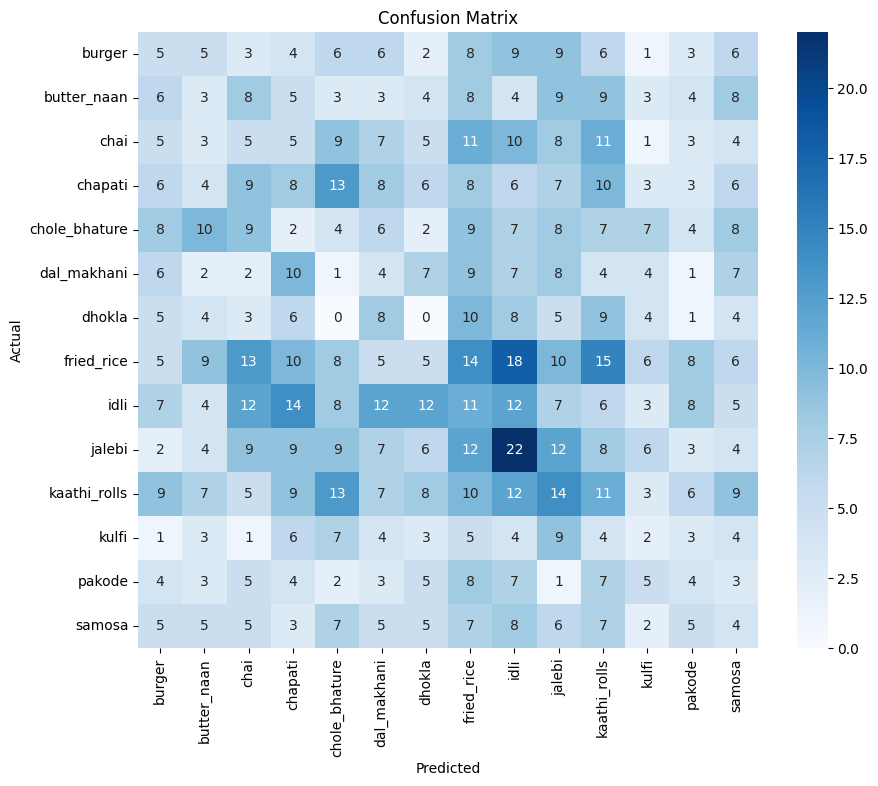

In [22]:
evaluate_model(model, validation_generator, list(validation_generator.class_indices.keys()))

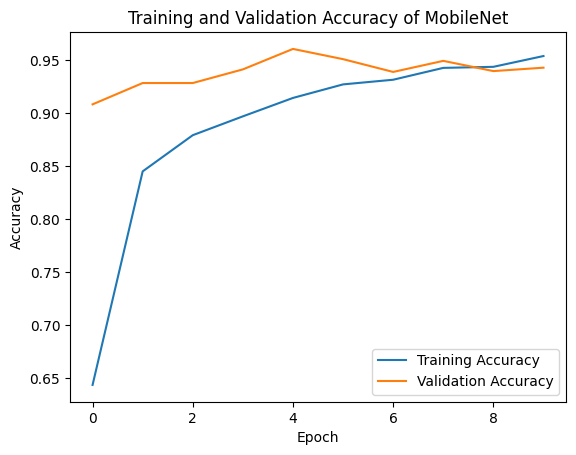

In [23]:
# Visualization
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy of MobileNet')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [24]:
def visualize_predictions(model, test_generator, num_images=9):
    test_generator.reset()
    predictions = model.predict(test_generator)
    class_labels = list(test_generator.class_indices.keys())

    plt.figure(figsize=(10, 10))
    for i in range(num_images):
        plt.subplot(3, 3, i + 1)
        img, true_label = test_generator.next()
        img = img[0]
        pred_label = np.argmax(predictions[i])
        plt.imshow(img)
        plt.title(f"True: {class_labels[np.argmax(true_label)]}\nPredicted: {class_labels[pred_label]}")
        plt.axis('off')

        if pred_label != np.argmax(true_label):
            plt.title(f"True: {class_labels[np.argmax(true_label)]}\nPredicted: {class_labels[pred_label]}", color='red')

    plt.tight_layout()
    plt.show()

39/39 [==============================] - 110s 3s/step


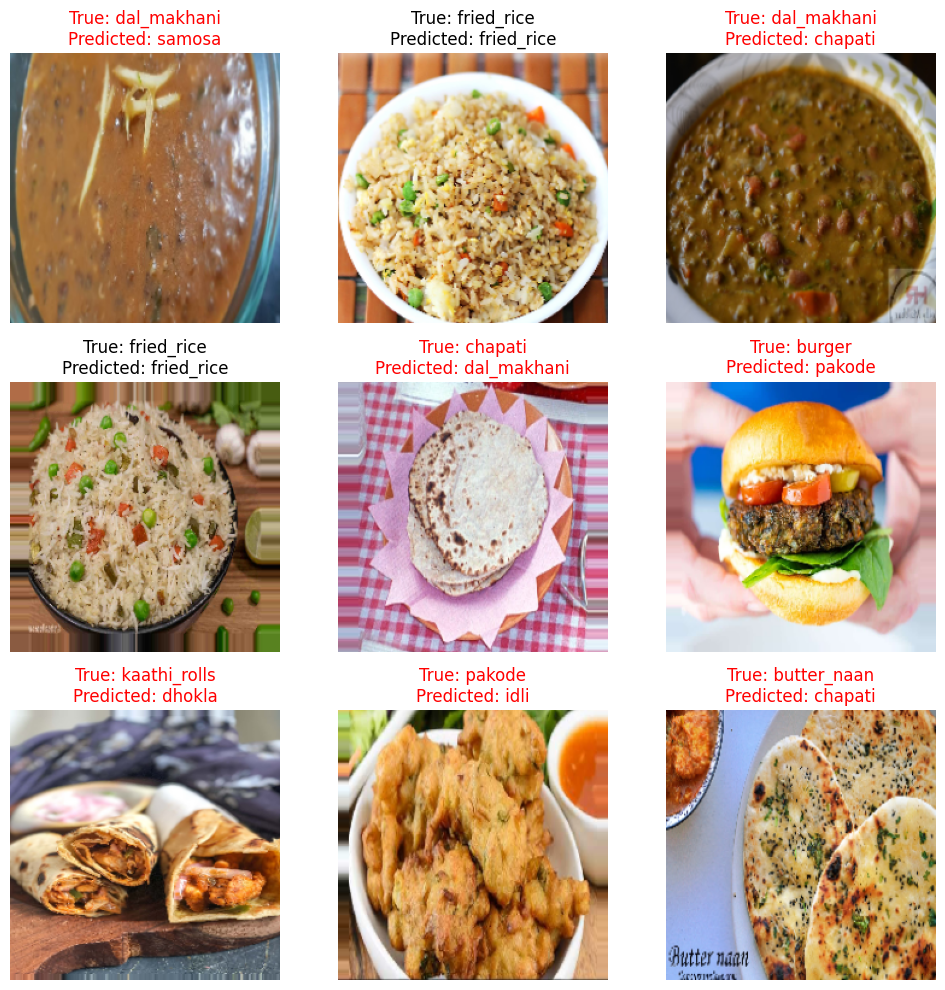

In [20]:
visualize_predictions(model, validation_generator)